### **NLTK (Natural Language Toolkit)**
#### References
- [https://www.youtube.com/watch?v=XFoehWRzG-I](https://www.youtube.com/watch?v=XFoehWRzG-I)

#### Text Mining Sentiment Analysis
**Text Extraction & Preprocessing**  

Tokenization: Process of removing sensitive data and placing unique symbol of identification in its place to retain all the essential information

In [1]:
tokenization_data = 'Hello! This is sentence'

from nltk.tokenize import sent_tokenize
print(sent_tokenize(tokenization_data))

['Hello!', 'This is sentence']


In [2]:
from nltk.tokenize import word_tokenize
print(word_tokenize(tokenization_data))

['Hello', '!', 'This', 'is', 'sentence']


N-grams: It is a simple language modal that assign probabilities to sequences of words and sentences. N-grams are combinations of adjacent words or letters of length n in the source text

In [3]:
ngrams_data = 'NLTK (Natural Language Toolkit) is a leading platform'

tokens = word_tokenize(ngrams_data)

from nltk.util import ngrams
n_grams = list(ngrams(tokens, 2))

for gram in n_grams:
    print(gram)

('NLTK', '(')
('(', 'Natural')
('Natural', 'Language')
('Language', 'Toolkit')
('Toolkit', ')')
(')', 'is')
('is', 'a')
('a', 'leading')
('leading', 'platform')


Stop Word Removal: are natural language words which have very little meaning, such as "a", "an", "and", "or", "the". These words take up space in the database and increase the processing time. They can be removed by storing a list of stop words.

In [4]:
from nltk.corpus import stopwords

stop_words_data = 'An apple a day keep doctor away'

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(stop_words_data)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(filtered_sentence)

['An', 'apple', 'day', 'keep', 'doctor', 'away']


Stemming: involves reducing a word to stem or base (root) form by removing suffixes. Various stemming algorithms: Porter stemmer, Lancaster  stemmer, Snowball stemmer

In [5]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemming_data = 'importantance of caving  as explained by cavers'

stemming_words = word_tokenize(stemming_data)
for w in stemming_words:
    print(ps.stem(w))

important
of
cave
as
explain
by
caver


Lemmatization: This is the method of grouping the various inflected types of a word so that they can be analyzed as one item. It uses a vocabulary list and morphological analysis (POS of a word) to get the root word

In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet'))
print(lemmatizer.lemmatize('carti'))
print(lemmatizer.lemmatize('geese'))

# Without a POS tag, lemmatizer assumes everything  is a noun
print(lemmatizer.lemmatize('loving'))
print(lemmatizer.lemmatize('loving', 'v')) # with POS tag

foot
carti
goose
loving
love


POS Tagging: Part-Of-Speech tagging marks words in the corpus to a corresponding part of speech tag based on its context and definition
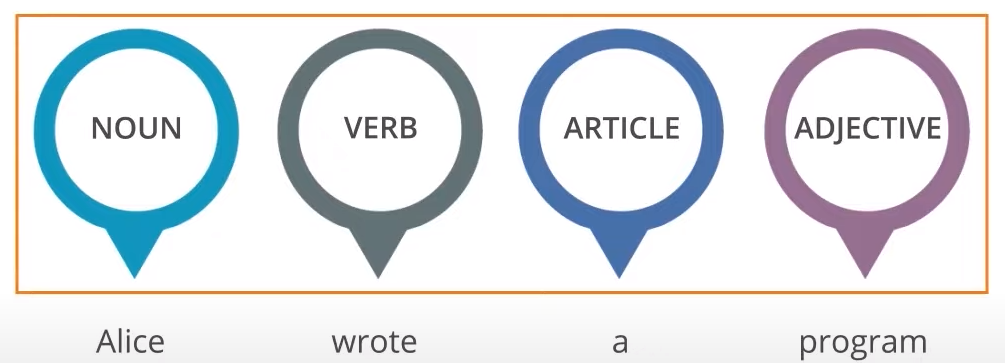

In [7]:
pos_data = '''
    In the vast landscape of human knowledge, Python stands tall as a versatile and powerful language, 
    offering a gateway to endless possibilities. With its simplicity and elegance, Python empowers both novices 
    and experts alike to craft solutions to complex problems with ease. From data science to web development, 
    from artificial intelligence to automation, Python's reach knows no bounds. As we navigate the digital era, Python 
    serves as a beacon of innovation, illuminating pathways to creativity and discovery. So let us embrace Python's charm, 
    for within its syntax lies the key to unlocking a world limited only by our imagination.
'''

from nltk.tag import pos_tag

pos_tokens = sent_tokenize(pos_data)
for i in pos_tokens:
    words_list = word_tokenize(i)
    words_list = [w for w in words_list if not w in stop_words]
    tagged = pos_tag(words_list)

print(tagged)

[('So', 'RB'), ('let', 'VB'), ('us', 'PRP'), ('embrace', 'VB'), ('Python', 'NNP'), ("'s", 'POS'), ('charm', 'NN'), (',', ','), ('within', 'IN'), ('syntax', 'JJ'), ('lies', 'NNS'), ('key', 'VBP'), ('unlocking', 'JJ'), ('world', 'NN'), ('limited', 'VBD'), ('imagination', 'NN'), ('.', '.')]


Named Entity Recognition: seeks to extract a real-world entity from the text and sorts it into predefined categories such as the names of persons, organizations, locations, etc.

In [8]:
ner_data = '''
    Google LLC (/ˈɡuːɡəl/ ⓘ, GOO-ghəl) is an American multinational corporation and technology company focusing on online advertising, 
    search engine technology, cloud computing, computer software, quantum computing, e-commerce, consumer electronics, and artificial intelligence (AI).[9] 
    It has been referred to as "the most powerful company in the world"[10] and as one of the world's most valuable brands due to its market dominance, data collection, 
    and technological advantages in the field of AI.[11][12][13] Google's parent company Alphabet Inc. is one of the five Big Tech companies, alongside Amazon, Apple, Meta, and Microsoft
'''

from nltk.chunk import ne_chunk

ner_tokens = word_tokenize(ner_data)
ner_tagged_sentences = pos_tag(ner_tokens)
ner_ne_chunked_sents = ne_chunk(ner_tagged_sentences)

# extract all named entities
named_entities = []
for tagged_tree in ner_ne_chunked_sents:
    if hasattr(tagged_tree, 'label'):
        entity_name = ' '.join(c[0] for c in tagged_tree.leaves())
        entity_type = tagged_tree.label()
        named_entities.append((entity_name, entity_type))
print(named_entities)

[('Google', 'PERSON'), ('LLC', 'ORGANIZATION'), ('American', 'GPE'), ('AI', 'ORGANIZATION'), ('Google', 'PERSON'), ('Alphabet Inc.', 'ORGANIZATION'), ('Amazon', 'PERSON'), ('Apple', 'PERSON'), ('Meta', 'ORGANIZATION'), ('Microsoft', 'ORGANIZATION')]


**NLP Process Workflow**  
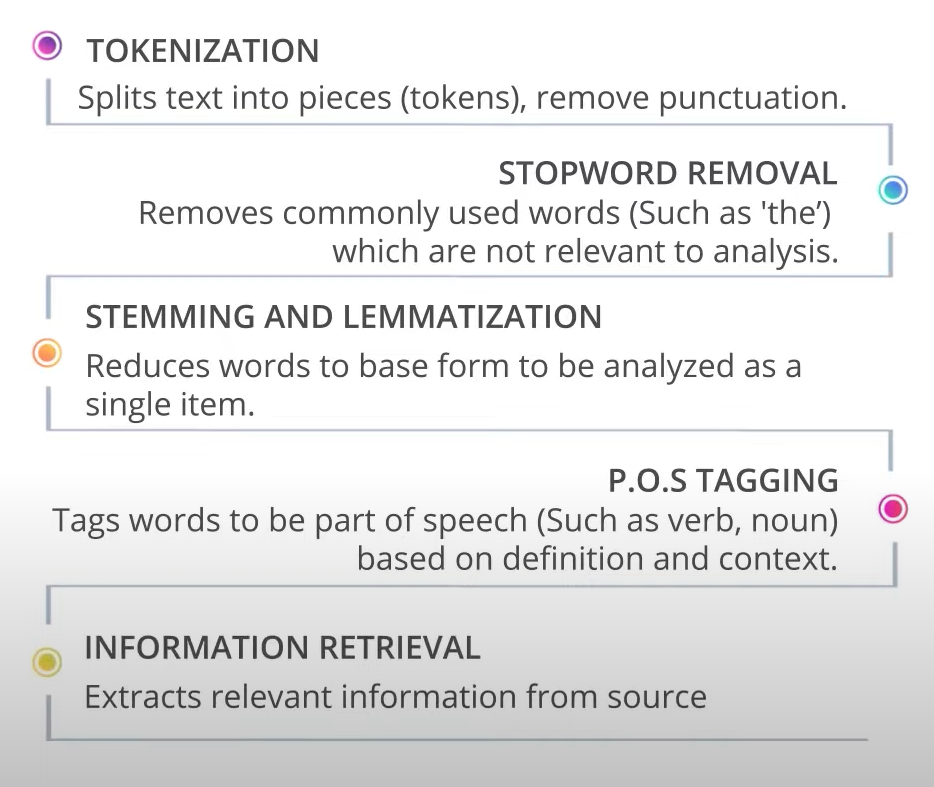

**Practice**  
Extract person name, organization, location, etc

In [9]:
with open('brown_corpus_ca10.txt', 'r') as myfile:
    data = myfile.read().replace('\n', '')
print(data)

	Vincent/np G./np Ierulli/np has/hvz been/ben appointed/vbn temporary/jj assistant/nn district/nn attorney/nn ,/, it/pps was/bedz announced/vbn Monday/nr by/in Charles/np E./np Raymond/np ,/, District/nn-tl Attorney/nn-tl ./.	Ierulli/np will/md replace/vb Desmond/np D./np Connall/np who/wps has/hvz been/ben called/vbn to/in active/jj military/jj service/nn but/cc is/bez expected/vbn back/rb on/in the/at job/nn by/in March/np 31/cd ./.	Ierulli/np ,/, 29/cd ,/, has/hvz been/ben practicing/vbg in/in Portland/np since/in November/np ,/, 1959/cd ./.He/pps is/bez a/at graduate/nn of/in Portland/np-tl University/nn-tl and/cc the/at Northwestern/jj-tl College/nn-tl of/in-tl Law/nn-tl ./.He/pps is/bez married/vbn and/cc the/at father/nn of/in three/cd children/nns ./.	Helping/vbg foreign/jj countries/nns to/to build/vb a/at sound/jj political/jj structure/nn is/bez more/ql important/jj than/cs aiding/vbg them/ppo economically/rb ,/, E./np M./np Martin/np ,/, assistant/nn secretary/nn of/in stat

In [10]:
data = data.replace('/', '')
data

"\tVincentnp G.np Ierullinp hashvz beenben appointedvbn temporaryjj assistantnn districtnn attorneynn ,, itpps wasbedz announcedvbn Mondaynr byin Charlesnp E.np Raymondnp ,, Districtnn-tl Attorneynn-tl ..\tIerullinp willmd replacevb Desmondnp D.np Connallnp whowps hashvz beenben calledvbn toin activejj militaryjj servicenn butcc isbez expectedvbn backrb onin theat jobnn byin Marchnp 31cd ..\tIerullinp ,, 29cd ,, hashvz beenben practicingvbg inin Portlandnp sincein Novembernp ,, 1959cd ..Hepps isbez aat graduatenn ofin Portlandnp-tl Universitynn-tl andcc theat Northwesternjj-tl Collegenn-tl ofin-tl Lawnn-tl ..Hepps isbez marriedvbn andcc theat fathernn ofin threecd childrennns ..\tHelpingvbg foreignjj countriesnns toto buildvb aat soundjj politicaljj structurenn isbez moreql importantjj thancs aidingvbg themppo economicallyrb ,, E.np M.np Martinnp ,, assistantnn secretarynn ofin statenn forin economicjj affairsnns toldvbd membersnns ofin theat Worldnn-tl Affairsnns-tl Councilnn-tl Monda

In [11]:
sentences = sent_tokenize(data)
print(sentences)

["\tVincentnp G.np Ierullinp hashvz beenben appointedvbn temporaryjj assistantnn districtnn attorneynn ,, itpps wasbedz announcedvbn Mondaynr byin Charlesnp E.np Raymondnp ,, Districtnn-tl Attorneynn-tl ..\tIerullinp willmd replacevb Desmondnp D.np Connallnp whowps hashvz beenben calledvbn toin activejj militaryjj servicenn butcc isbez expectedvbn backrb onin theat jobnn byin Marchnp 31cd ..\tIerullinp ,, 29cd ,, hashvz beenben practicingvbg inin Portlandnp sincein Novembernp ,, 1959cd ..Hepps isbez aat graduatenn ofin Portlandnp-tl Universitynn-tl andcc theat Northwesternjj-tl Collegenn-tl ofin-tl Lawnn-tl ..Hepps isbez marriedvbn andcc theat fathernn ofin threecd childrennns ..\tHelpingvbg foreignjj countriesnns toto buildvb aat soundjj politicaljj structurenn isbez moreql importantjj thancs aidingvbg themppo economicallyrb ,, E.np M.np Martinnp ,, assistantnn secretarynn ofin statenn forin economicjj affairsnns toldvbd membersnns ofin theat Worldnn-tl Affairsnns-tl Councilnn-tl Mond

In [12]:
tokens_sentences = [word_tokenize(sentence) for sentence in sentences]
print(tokens_sentences)

[['Vincentnp', 'G.np', 'Ierullinp', 'hashvz', 'beenben', 'appointedvbn', 'temporaryjj', 'assistantnn', 'districtnn', 'attorneynn', ',', ',', 'itpps', 'wasbedz', 'announcedvbn', 'Mondaynr', 'byin', 'Charlesnp', 'E.np', 'Raymondnp', ',', ',', 'Districtnn-tl', 'Attorneynn-tl', '..', 'Ierullinp', 'willmd', 'replacevb', 'Desmondnp', 'D.np', 'Connallnp', 'whowps', 'hashvz', 'beenben', 'calledvbn', 'toin', 'activejj', 'militaryjj', 'servicenn', 'butcc', 'isbez', 'expectedvbn', 'backrb', 'onin', 'theat', 'jobnn', 'byin', 'Marchnp', '31cd', '..', 'Ierullinp', ',', ',', '29cd', ',', ',', 'hashvz', 'beenben', 'practicingvbg', 'inin', 'Portlandnp', 'sincein', 'Novembernp', ',', ',', '1959cd', '..', 'Hepps', 'isbez', 'aat', 'graduatenn', 'ofin', 'Portlandnp-tl', 'Universitynn-tl', 'andcc', 'theat', 'Northwesternjj-tl', 'Collegenn-tl', 'ofin-tl', 'Lawnn-tl', '..', 'Hepps', 'isbez', 'marriedvbn', 'andcc', 'theat', 'fathernn', 'ofin', 'threecd', 'childrennns', '..', 'Helpingvbg', 'foreignjj', 'countri

In [13]:
tagged_sentences = [pos_tag(sentence) for sentence in tokens_sentences]
print(tagged_sentences)

[[('Vincentnp', 'NNP'), ('G.np', 'NNP'), ('Ierullinp', 'NNP'), ('hashvz', 'NN'), ('beenben', 'NN'), ('appointedvbn', 'NN'), ('temporaryjj', 'NN'), ('assistantnn', 'NN'), ('districtnn', 'NN'), ('attorneynn', 'NN'), (',', ','), (',', ','), ('itpps', 'JJ'), ('wasbedz', 'NN'), ('announcedvbn', 'NN'), ('Mondaynr', 'NNP'), ('byin', 'NN'), ('Charlesnp', 'NNP'), ('E.np', 'NNP'), ('Raymondnp', 'NNP'), (',', ','), (',', ','), ('Districtnn-tl', 'NNP'), ('Attorneynn-tl', 'NNP'), ('..', 'NNP'), ('Ierullinp', 'NNP'), ('willmd', 'VBD'), ('replacevb', 'JJ'), ('Desmondnp', 'NNP'), ('D.np', 'NNP'), ('Connallnp', 'NNP'), ('whowps', 'VBD'), ('hashvz', 'JJ'), ('beenben', 'NN'), ('calledvbn', 'NN'), ('toin', 'NN'), ('activejj', 'NN'), ('militaryjj', 'NN'), ('servicenn', 'NN'), ('butcc', 'NN'), ('isbez', 'NN'), ('expectedvbn', 'NN'), ('backrb', 'NN'), ('onin', 'NN'), ('theat', 'NN'), ('jobnn', 'NN'), ('byin', 'NN'), ('Marchnp', 'NNP'), ('31cd', 'CD'), ('..', 'NNP'), ('Ierullinp', 'NNP'), (',', ','), (',', ',

In [14]:
from nltk.chunk import ne_chunk_sents
chunked_sentences = ne_chunk_sents(tagged_sentences, binary=True)

In [15]:
def extract_entity_names(t):
    entity_names = []

    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))
    return entity_names

In [16]:
entity_names = []
for tree in chunked_sentences:
    entity_names.extend(extract_entity_names(tree))

print(set(entity_names))

{'Eugenenp', 'Ajnn', 'Franknp Leenp', 'SWnn Maplecrestnp', 'Dwightnp', 'Hepps', 'Portlandnp', 'Oregonnp', 'Americansnps', 'Attorneynn Dwightnp', 'Barbaranp Njustnp', 'Alnp Ullmannp', 'Losnp Angelesnp', 'Donaldnp Huffmannp', 'Martinnp', 'Sovietnp', 'Blainenp Whipplenp', 'Jamesnp', 'Tuesdaynr', 'Jamesnp Culbertsonnp', 'Salemnp', 'Vincentnp', 'Jacknp', 'Biblenp', 'Philipnp Weinsteinnp', 'Deannp Brysonnp', 'Milesnp'}


#### Structuring Sentences
Syntax: is the grammatical structure of sentences

**Practice**

In [17]:
import os
pathogs = 'C:\\Program Files\\gs\\gs10.03.0\\bin'

In [18]:
os.environ['PATH']+=os.pathsep+pathogs

In [19]:
import pandas as pd
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
df = df[['text', 'airline_sentiment_gold']]
df.head()

,text,airline_sentiment_gold
0,@VirginAmerica What @dhepburn said.,NaN
1,@VirginAmerica plus you've added commercials t...,NaN
2,@VirginAmerica I didn't today... Must mean I n...,NaN
3,@VirginAmerica it's really aggressive to blast...,NaN
4,@VirginAmerica and it's a really big bad thing...,NaN


In [21]:
import re
r = re.compile(r'([@])(\w+)\b')

AllReferences = map(lambda x: r.findall(x), df['text'])
print(list(AllReferences))

[[('@', 'VirginAmerica'), ('@', 'dhepburn')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'virginamerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica'), ('@', 'Australia')], [('@', 'VirginAmerica'), ('@', 'virginmedia')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica')], [('@', 'VirginAmerica'), ('@', 'Pacificbiznews')], [('

In [22]:
import itertools
chain = itertools.chain.from_iterable(AllReferences)
print(list(chain))
# lista = list(itertools.chain.from_iterable(AllReferences))
# print(list)
# unique_references = set()
# print(list(unique_references))
# References = map(lambda x: x[0] + x[1], AllUniqueReferencesCombined)

# file = open('References.txt', 'a')
# for each in References:
#     file.write(each + '\n')
# file.close()

[]
